## Meteor Data - Link: https://catalog.data.gov/dataset/meteorite-landings

In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns",None)
print(plt.style.available)
plt.style.use("bmh")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [44]:
df = pd.read_csv("Meteorite_Landings.csv")
for i in df['year']:
    if type(i) == np.float64:
        i = i.astype(np.int64)

print(type(df['year'][0]))
df.head()

<class 'numpy.float64'>


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [45]:
nrows,ncols = df.shape 
print(f"# of rows: {nrows}\n# of columns: {ncols}")

# of rows: 45716
# of columns: 10


In [46]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [47]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [48]:
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [60]:
df.describe()

,mass (g),year,reclat,reclong
count,4.555900e+04,45351.000000,38331.000000,38331.000000
mean,1.328566e+04,1991.816211,-39.288446,61.146518
std,5.751528e+05,25.069903,46.241293,80.690908
min,0.000000e+00,860.000000,-87.366670,-165.433330
25%,7.200000e+00,1987.000000,-76.716320,0.000000
50%,3.270000e+01,1998.000000,-71.500000,35.666670
75%,2.029000e+02,2003.000000,0.000000,157.166670
max,6.000000e+07,2101.000000,81.166670,354.473330


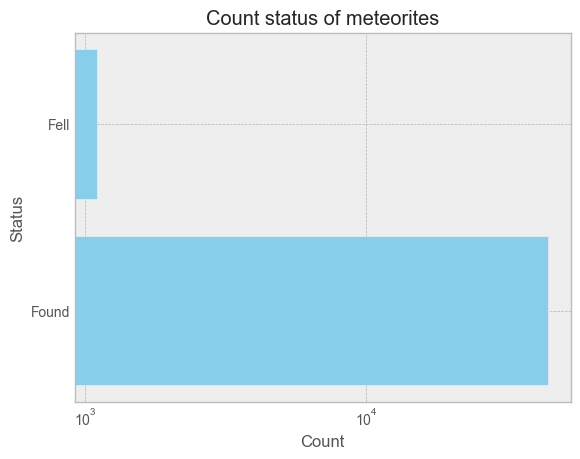

In [79]:
fall_cases = pd.DataFrame(df['fall'].value_counts())
plt.barh(fall_cases.index,fall_cases['count'],color='skyblue')
plt.xscale("log")
plt.xlabel("Count")
plt.ylabel("Status")
plt.title("Count status of meteorites")
plt.show()

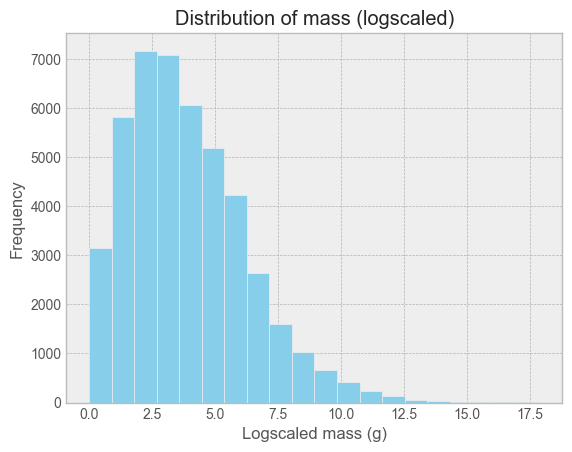

In [80]:

plt.hist(np.log1p(df['mass (g)']),bins=20,color='skyblue')
plt.xlabel("Logscaled mass (g)")
plt.ylabel("Frequency")
plt.title("Distribution of mass (logscaled)")
plt.show()

In [49]:
df['nametype'].value_counts()

nametype
Valid     45641
Relict       75
Name: count, dtype: int64

In [50]:
df.drop(df[df['nametype'] == 'Relict'].index,inplace=True)

In [51]:
df.drop(columns=['nametype'],inplace=True)

In [52]:
recclass_vals = pd.DataFrame(df['recclass'].value_counts().sort_values(ascending=False))

In [53]:
top_10_classes = recclass_vals[:10]
top_10_classes

,count
recclass,
L6,8285
H5,7142
L5,4796
H6,4528
H4,4211
LL5,2766
LL6,2043
L4,1253
H4/5,428


Text(0, 0.5, 'count')

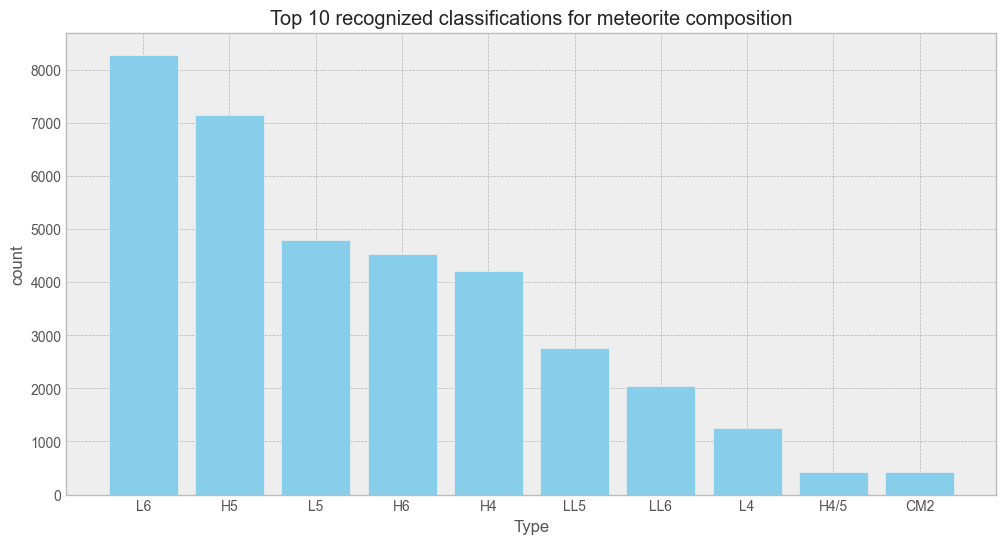

In [54]:
plt.figure(figsize=(12,6))
plt.bar(top_10_classes.index,top_10_classes['count'],color='skyblue')
plt.title("Top 10 recognized classifications for meteorite composition")
plt.xlabel("Type")
plt.ylabel("count")

In [55]:
df.set_index("id",drop=True,inplace=True)
df.head()

,name,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,
1,Aachen,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
6,Abee,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
10,Acapulco,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
370,Achiras,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [56]:
meteors_per_years = pd.DataFrame(df['year'].value_counts().sort_values(ascending=False))

In [57]:
top_10_years_meteors = meteors_per_years.iloc[:10]
top_10_years_meteors

,count
year,
2003.0,3321
1979.0,3045
1998.0,2693
2006.0,2453
1988.0,2296
2002.0,2072
2004.0,1937
2000.0,1781
1997.0,1691


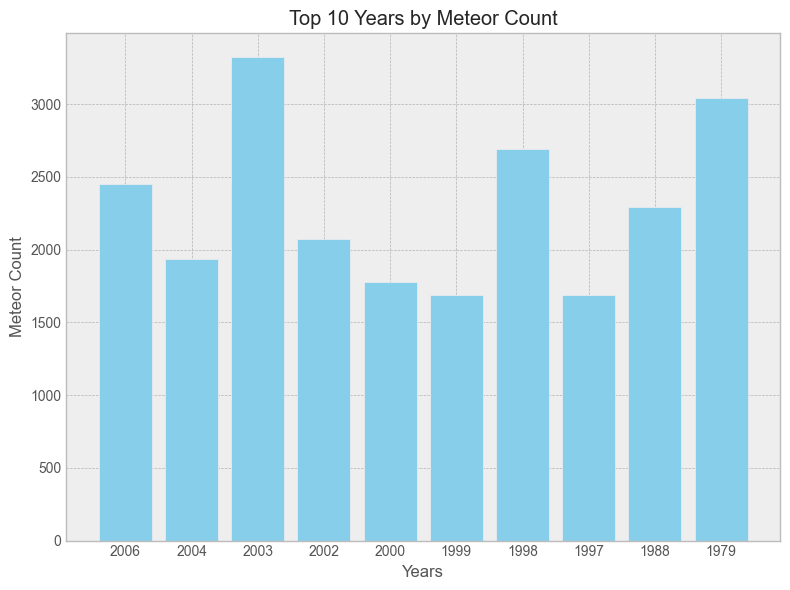

In [58]:
top_10_years_meteors = top_10_years_meteors.sort_index(ascending=False)

categories = [str(np.int64(i)) for i in top_10_years_meteors.index]
counts = top_10_years_meteors['count']

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color='skyblue')

plt.title('Top 10 Years by Meteor Count')
plt.xlabel('Years')
plt.ylabel('Meteor Count')
plt.tight_layout()
plt.show()


,name,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,
1,Aachen,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
6,Abee,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
10,Acapulco,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
370,Achiras,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...
31356,Zillah 002,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
30409,Zinder,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
30410,Zlin,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"


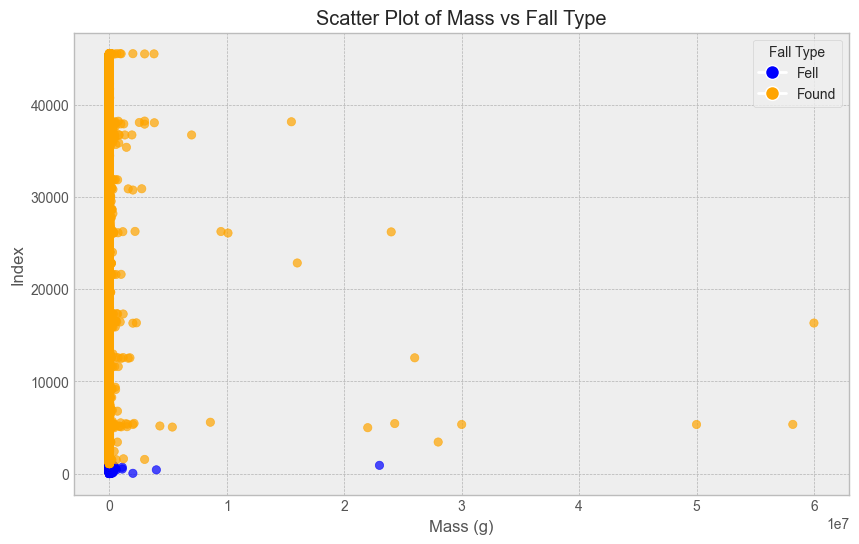

In [91]:
mass = df['mass (g)']
fall = df['fall']

filtered_data = df[(mass.notna()) & (fall.notna())]

# Map categories in 'fall' to colors
fall_categories = filtered_data['fall'].unique()
fall_colors = {cat: color for cat, color in zip(fall_categories, ['blue', 'orange'])}

colors = filtered_data['fall'].map(fall_colors)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['mass (g)'], range(len(filtered_data)), c=colors, alpha=0.7)

# Add labels and title
plt.xlabel('Mass (g)')
plt.ylabel('Index')
plt.title('Scatter Plot of Mass vs Fall Type')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=fall_colors[cat],
                               markersize=10, label=cat) for cat in fall_categories], title="Fall Type")
plt.grid(True)
plt.show()
